In [77]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

In [78]:
player_data=read_csv("https://raw.githubusercontent.com/Arzmxn/ideal-umbrella/refs/heads/main/players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


In [79]:
nrow(player_data) #Number of Observations
summary_data=player_data|> #Summary Statistics
    select(played_hours,Age)|>
    summarize(across(played_hours:Age, ~ mean(.x, na.rm = TRUE)))
summary_data 

[1] 196

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


This data set is about the unique player data. This includes 7 variables being experience, subscribe,hashedEmail,played_hours, name, gender, and Age.
- Experience is how experienced the player is (character).
- Subscription describes the subscription status of the player. (logical)
- hashedEmail is a unique identifier for a player based on their email. (character)
- played_hours is the number of hours the player has on the server. (double)
- name is the first name of the player (character)
- gender is the preferred gender of the player. (character)
- Age is the age of the player (double)
- The average played hours by players is 5.85 hours, and the average age of players is 21.14 years.
- There are 196 observations in the data set.

The major issue I see is the presence of missing data within Age. Another issue the small subsection that I am viewing may not be representative of the entire data set and may include other potential observations/values for some of the variables.  

Using this data set, I plan to answer the broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  
To do this, I will be answering the more specific question of: Can played hours and age predict subscription status in players.csv? I will be using players.csv because it has both a subscription status for each of the unique players, a total playtime for said players, and an age for each player. I will likely need to change the type of variable of subscription to Class with the as_factor function. After that, I will select for subscribers, played_hours, and age, as those are the only relevant variables I will be using. I will also filter out any N/A Age observations.

The scatterplot shows no clear correlation between total playtime and the age of the player, though the more extreme values of playtime appear to be concentrated on the younger demographic (around 18 years old). The first histogram shows the distribution of player age, with players typically being around 18 years old. Also indicates that most subscribers come from that same demographic. The only conclusion that can be made from the second histogram is that most players have a total playtime of around 7 hours.  

I believe the best method to answer the question is KNN classification. It should be a classification because we are trying to predict a factor, not a numerical variable. KNN classification would assume that the data is scaled properly. From the scatterplot, it can be seen that there are a lot of outliers and a bit of noise, which may reduce the effectiveness of the model. To create the best possible model, I plan to first scale the data, then split it into 65% training and 35% testing. I will then tune for the best k value with five-fold cross-validation and pick the highest accuracy.  
Github: https://github.com/Arzmxn/ideal-umbrella

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


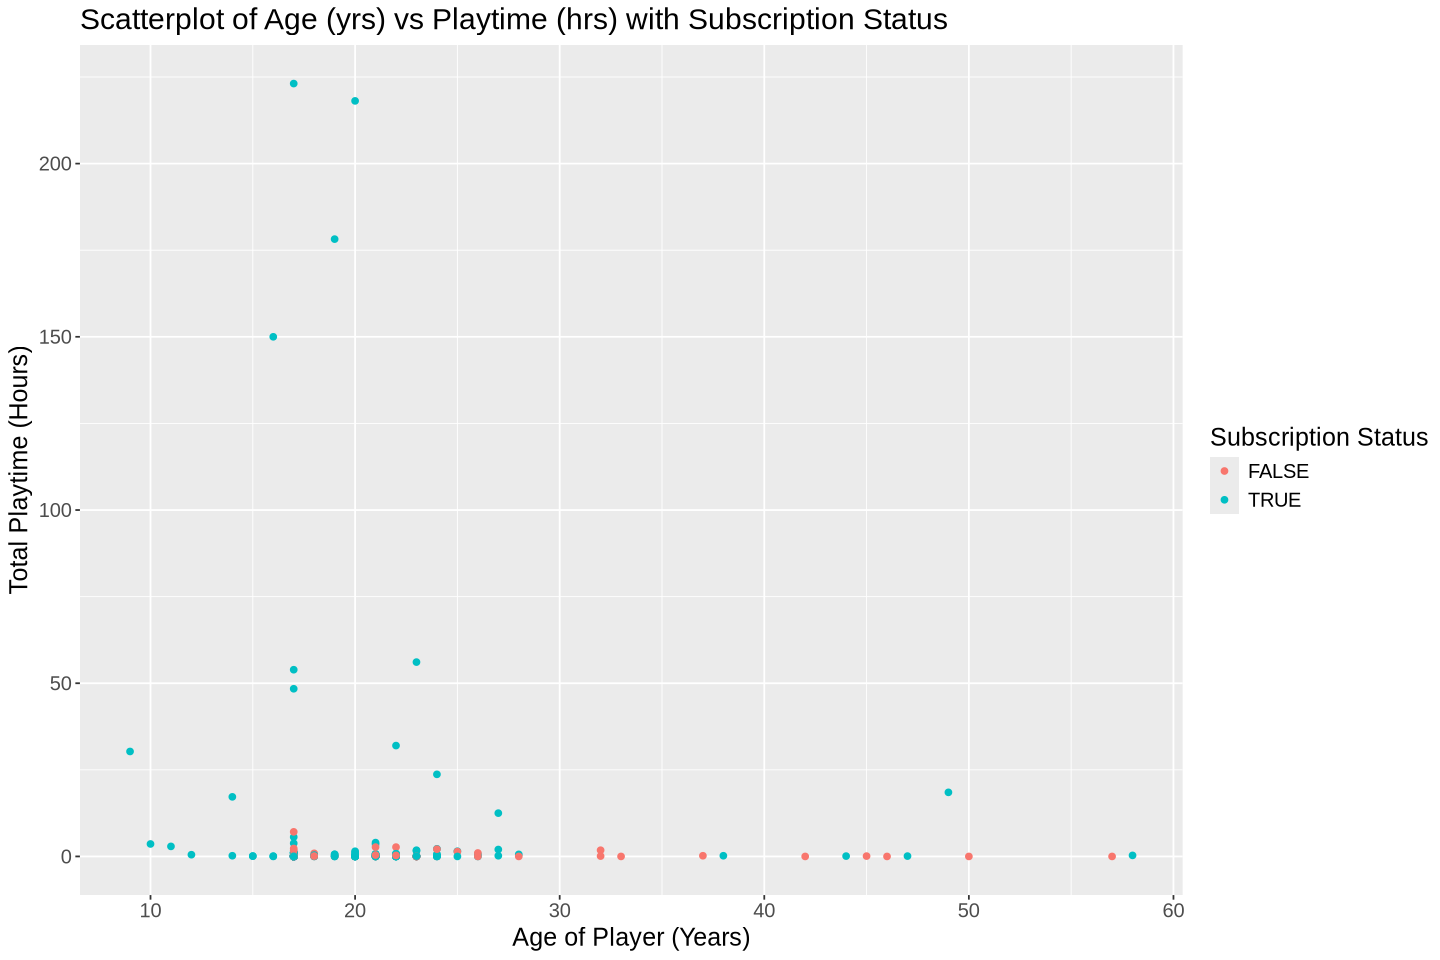

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


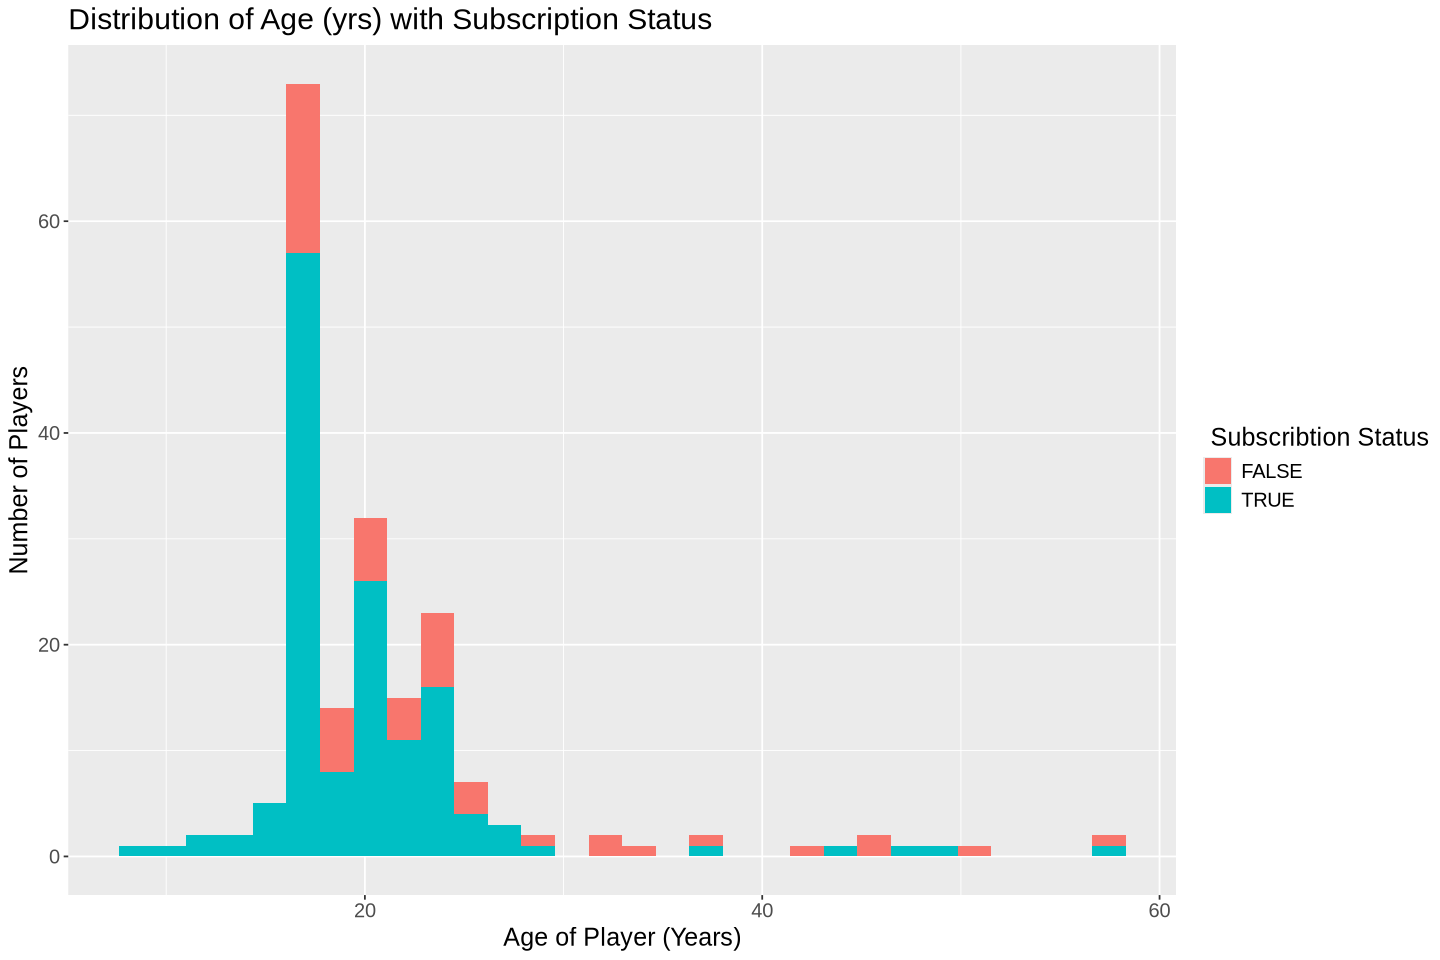

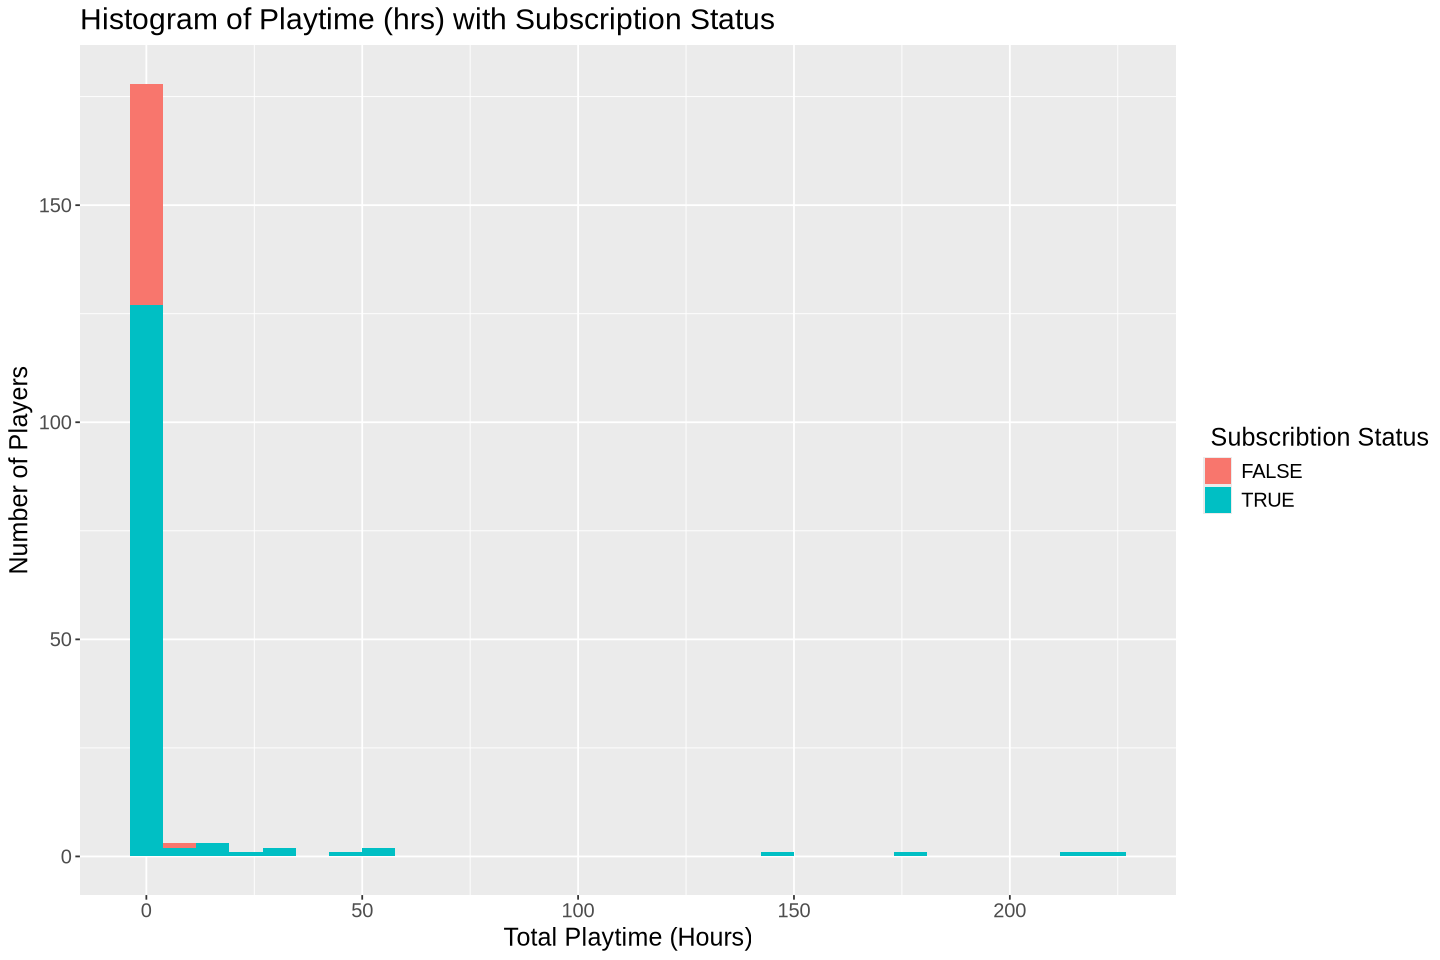

In [80]:
#Visualizations
options(repr.plot.width = 12, repr.plot.height = 8)
relevant_player=player_data|>
    mutate(subscribe=as_factor(subscribe))|>
    select(subscribe,played_hours,Age)|>
    filter(Age>=0)

scatter_viz=relevant_player|>
    ggplot(aes(x=Age,y=played_hours,color=subscribe))+
    geom_point()+
    labs(x="Age of Player (Years)",y="Total Playtime (Hours)",color="Subscription Status",title = "Scatterplot of Age (yrs) vs Playtime (hrs) with Subscription Status")+
    theme(text = element_text(size = 15))

scatter_viz

histogram_viz_1=relevant_player|>
    ggplot(aes(x=Age,fill=subscribe))+
    geom_histogram()+
    labs(x="Age of Player (Years)",y="Number of Players", fill=" Subscribtion Status", title = "Distribution of Age (yrs) with Subscription Status")+
    theme(text = element_text(size = 15))
histogram_viz_1

histogram_viz_2=relevant_player|>
    ggplot(aes(x=played_hours,fill=subscribe))+
    geom_histogram()+
    labs(x="Total Playtime (Hours)",y="Number of Players",fill=" Subscribtion Status",title = "Histogram of Playtime (hrs) with Subscription Status")+
    theme(text = element_text(size = 15))
histogram_viz_2
